In [ ]:
#used for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
#to perform mathematical operations on array
import numpy as np
from tqdm import tqdm
#DataFrame to analize the data
import pandas as pd

In [ ]:
from google.colab import files
upload=files.upload()

Saving part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv to part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


In [ ]:
data=pd.read_csv('part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.0,3.323353,3.323353,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331372e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
1,0.000000,0.00,1.00,64.0,9.252764,9.252764,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314963e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,4.353708,107.66,6.00,64.0,0.454788,0.454788,0.0,0.0,0.0,0.0,...,0.384222,54.20,8.294750e+07,9.5,10.401817,0.544886,1.862815,0.08,141.55,DoS-TCP_Flood
3,0.000000,54.00,6.00,64.0,10.372210,10.372210,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309349e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
4,0.478727,29.17,38.57,81.8,13.372884,13.372884,0.0,0.0,0.0,0.0,...,141.903128,475.79,8.358175e+07,9.5,30.145014,200.744483,29756.313596,0.71,141.55,Mirai-greip_flood


**Pre - Processing**

In [ ]:
data.shape

(227910, 47)

In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [ ]:
data.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,227910.000000,2.279100e+05,227910.000000,227910.000000,2.279100e+05,2.279100e+05,227910.000000,227910.000000,227910.000000,227910.000000,...,227910.000000,227910.000000,227910.000000,2.279100e+05,227910.000000,227910.000000,227910.000000,2.279100e+05,227910.000000,227910.000000
mean,6.423907,7.592310e+04,9.072313,66.354986,9.198759e+03,9.198759e+03,0.000003,0.086245,0.206494,0.089983,...,124.620546,33.312633,124.640277,8.320717e+07,9.499654,13.118281,47.074586,3.085976e+04,0.096522,141.541344
std,321.721716,4.535702e+05,8.934327,14.088299,1.026084e+05,1.026084e+05,0.001458,0.280725,0.404790,0.286158,...,241.649359,160.921604,242.051204,1.711693e+07,0.822052,8.633238,227.589300,3.284576e+05,0.233024,21.152971
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.139973e+00,2.139973e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307156e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.605696e+01,1.605696e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312452e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.104926,4.161725e+02,15.240000,64.000000,1.230812e+02,1.230812e+02,0.000000,0.000000,0.000000,0.000000,...,54.046126,0.371910,54.060000,8.334400e+07,9.500000,10.396616,0.505921,1.387757e+00,0.080000,141.550000
max,59466.464173,9.760969e+06,47.000000,255.000000,6.291456e+06,6.291456e+06,0.694823,1.000000,1.000000,1.000000,...,7959.451706,6484.316413,5427.800000,1.676394e+08,14.500000,123.600132,9184.906058,4.239545e+07,1.000000,244.600000


In [ ]:
data['label'].unique()

array(['DDoS-PSHACK_Flood', 'DDoS-ICMP_Flood', 'DoS-TCP_Flood',
       'DDoS-SYN_Flood', 'Mirai-greip_flood', 'DDoS-SynonymousIP_Flood',
       'DDoS-UDP_Flood', 'DoS-UDP_Flood', 'Mirai-udpplain',
       'DDoS-RSTFINFlood', 'DoS-SYN_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Fragmentation', 'Mirai-greeth_flood',
       'DDoS-ICMP_Fragmentation', 'BenignTraffic', 'MITM-ArpSpoofing',
       'Recon-HostDiscovery', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood',
       'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood',
       'Recon-PortScan', 'Recon-PingSweep', 'Recon-OSScan',
       'VulnerabilityScan', 'DDoS-SlowLoris', 'SqlInjection',
       'Uploading_Attack', 'BrowserHijacking', 'XSS', 'Backdoor_Malware',
       'CommandInjection'], dtype=object)

In [ ]:
#DDOS
data.replace('DDoS-PSHACK_Flood', 'DDos', inplace=True)
data.replace('DDoS-ICMP_Flood', 'DDos', inplace=True)
data.replace('DDoS-SYN_Flood', 'DDos', inplace=True)
data.replace('DDoS-SynonymousIP_Flood', 'DDos', inplace=True)
data.replace('DDoS-UDP_Flood', 'DDos', inplace=True)
data.replace('DDoS-RSTFINFlood', 'DDos', inplace=True)
data.replace('DDoS-TCP_Flood', 'DDos', inplace=True)
data.replace( 'DDoS-UDP_Fragmentation', 'DDos', inplace=True)
data.replace('DDoS-ICMP_Fragmentation', 'DDos', inplace=True)
data.replace('DDoS-ACK_Fragmentation', 'DDos', inplace=True)
data.replace('DDoS-HTTP_Flood', 'DDos', inplace=True)
data.replace('DDoS-SlowLoris', 'DDos', inplace=True)

In [ ]:
#DOS
data.replace('DoS-UDP_Flood', 'Dos', inplace=True)
data.replace('DoS-SYN_Flood', 'Dos', inplace=True)
data.replace('DoS-TCP_Flood', 'Dos', inplace=True)
data.replace('DoS-HTTP_Flood', 'Dos', inplace=True)

In [ ]:
#MIRAI
data.replace('Mirai-greeth_flood', 'Mirai', inplace=True)
data.replace('Mirai-greip_flood', 'Mirai', inplace=True)
data.replace('Mirai-udpplain', 'Mirai', inplace=True)

In [ ]:
#SPOOFING
data.replace('DNS_Spoofing', 'Spoofing', inplace=True)
data.replace('MITM-ArpSpoofing', 'Spoofing', inplace=True)

In [ ]:
#RECON
data.replace('Recon-PingSweep', 'Recon', inplace=True)
data.replace('Recon-OSScan', 'Recon', inplace=True)
data.replace('Recon-PortScan', 'Recon', inplace=True)
data.replace('VulnerabilityScan', 'Recon', inplace=True)
data.replace('Recon-HostDiscovery', 'Recon', inplace=True)

In [ ]:
#BENIGN
data.replace('BenignTraffic', 'Benign', inplace=True)

#WEB
data.replace('BrowserHijacking', 'Web', inplace=True)
data.replace('Backdoor_Malware', 'Web', inplace=True)
data.replace('XSS', 'Web', inplace=True)
data.replace('Uploading_Attack', 'Web', inplace=True)
data.replace('SqlInjection', 'Web', inplace=True)
data.replace('CommandInjection', 'Web', inplace=True)

#BRUTEFORCE
data.replace('DictionaryBruteForce', 'Brute Force', inplace=True)

In [ ]:
#unique_labels=data['label'].unique()
#unique_labels
data['label'].unique()

array(['DDos', 'Dos', 'Mirai', 'Benign', 'Spoofing', 'Recon',
       'Brute Force', 'Web'], dtype=object)

In [ ]:
data.replace('DDos', 'Attack', inplace=True)
data.replace('Dos', 'Attack', inplace=True)
data.replace('Mirai', 'Attack', inplace=True)
data.replace('Brute Force', 'Attack', inplace=True)
data.replace('Spoofing', 'Attack', inplace=True)
data.replace('Recon', 'Attack', inplace=True)
data.replace('Web', 'Attack', inplace=True)

In [ ]:
#x=data.drop("label", axis=1)
x=data[['flow_duration', 'Header_Length','Protocol Type','Duration', 'Rate','Srate','Drate', 'fin_flag_number','syn_flag_number','rst_flag_number'  ]]
y=data['label']

In [ ]:
x.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.00,6.00,64.0,3.323353,3.323353,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.331372e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
1,0.000000,0.00,1.00,64.0,9.252764,9.252764,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.00,8.314963e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
2,4.353708,107.66,6.00,64.0,0.454788,0.454788,0.0,0.0,0.0,0.0,...,54.098906,0.384222,54.20,8.294750e+07,9.5,10.401817,0.544886,1.862815,0.08,141.55
3,0.000000,54.00,6.00,64.0,10.372210,10.372210,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.309349e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
4,0.478727,29.17,38.57,81.8,13.372884,13.372884,0.0,0.0,0.0,0.0,...,463.948535,141.903128,475.79,8.358175e+07,9.5,30.145014,200.744483,29756.313596,0.71,141.55


In [ ]:
y.head()

0    Attack
1    Attack
2    Attack
3    Attack
4    Attack
Name: label, dtype: object

In [ ]:
#splitting the data into test train sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=2)

**Feature Scalling**


*   As we are using the logistic regression, inorder to achive the globle minimum point of the parabola curve we perform standardization.


*   Standardization means scalling down the features based on the Standard normal distribution, where the mean is zero and standard deviation is one.








In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Lables Encoding

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['label']=label_encoder.fit_transform(data.label)
print(data['label'])

0         0
1         0
2         0
3         0
4         0
         ..
227905    0
227906    0
227907    0
227908    0
227909    0
Name: label, Length: 227910, dtype: int64


In [ ]:
data['label'].unique()

array([0, 1])

**Logistic Regression**

*   As our target variables are categorical data.
*   Good for maximum likelyhood estimation (Classification).






In [ ]:
#importing the logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(lr.intercept_)

[-0.7036534  -3.11861011  7.22710321  3.02229648 -4.15985399  1.44673032
 -1.03308831 -2.6809242 ]


In [ ]:
predict=lr.predict(x_test)

In [ ]:
predict

array(['DDos', 'DDos', 'Mirai', ..., 'Spoofing', 'DDos', 'DDos'],
      dtype=object)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Attack       0.98      1.00      0.99     66821
      Benign       0.19      0.04      0.06      1552

    accuracy                           0.97     68373
   macro avg       0.58      0.52      0.52     68373
weighted avg       0.96      0.97      0.97     68373



In [ ]:
cm=confusion_matrix(y_test, predict)

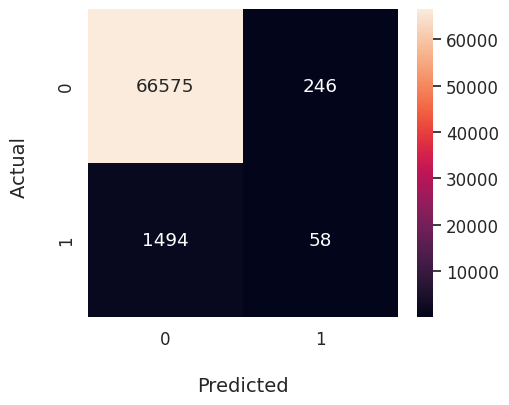

In [ ]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(5,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("Actual ", fontsize=14, labelpad=20)
#ax.set_title("Confusion Matrix for 2 class Attack Detection model", fontsize=14, pad=20)

plt.show()

For Multiple classes (8 Classes)

In [ ]:
print(classification_report(y_test,predict))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign       0.64      0.75      0.69      1552
 Brute Force       0.00      0.00      0.00        18
        DDos       0.82      0.99      0.90     49913
         Dos       0.72      0.16      0.26     11759
       Mirai       0.95      0.93      0.94      3794
       Recon       0.60      0.13      0.22       581
    Spoofing       0.55      0.12      0.20       721
         Web       0.00      0.00      0.00        35

    accuracy                           0.82     68373
   macro avg       0.54      0.39      0.40     68373
weighted avg       0.80      0.82      0.77     68373



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy: ',accuracy_score(y_test,predict))

Accuracy:  0.8309127872113261


In [ ]:
confusion_matrix(y_test, predict)

array([[ 1381,     0,    38,    32,     3,    50,    48,     0],
       [    7,     3,     3,     0,     0,     5,     0,     0],
       [   68,     0, 49391,   427,     0,    16,    11,     0],
       [   20,     0, 10031,  1689,     1,    10,     8,     0],
       [   15,     0,     4,     7,  3758,     0,    10,     0],
       [  190,     0,    53,    41,     1,   244,    52,     0],
       [  222,     0,    63,    22,    17,    51,   346,     0],
       [    8,     0,     3,     1,     2,    12,     9,     0]])

In [ ]:
#EDA
#sns.pairplot(data, hue='label')

In [ ]:
#pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

In [ ]:
#plotting a confusion matrix table
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
  labels=unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test,predict),columns=column,index=indices)
  return table


In [ ]:
plot(y_test, predict)

,Predicted Benign,Predicted Brute Force,Predicted DDos,Predicted Dos,Predicted Mirai,Predicted Recon,Predicted Spoofing,Predicted Web
Actual Benign,1381,0,38,32,3,50,48,0
Actual Brute Force,7,3,3,0,0,5,0,0
Actual DDos,68,0,49391,427,0,16,11,0
Actual Dos,20,0,10031,1689,1,10,8,0
Actual Mirai,15,0,4,7,3758,0,10,0
Actual Recon,190,0,53,41,1,244,52,0
Actual Spoofing,222,0,63,22,17,51,346,0
Actual Web,8,0,3,1,2,12,9,0


In [ ]:
import seaborn as sns

#plotting a heatmap
def plot(y_true, y_pred):
  labels=unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test,predict),columns=column,index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

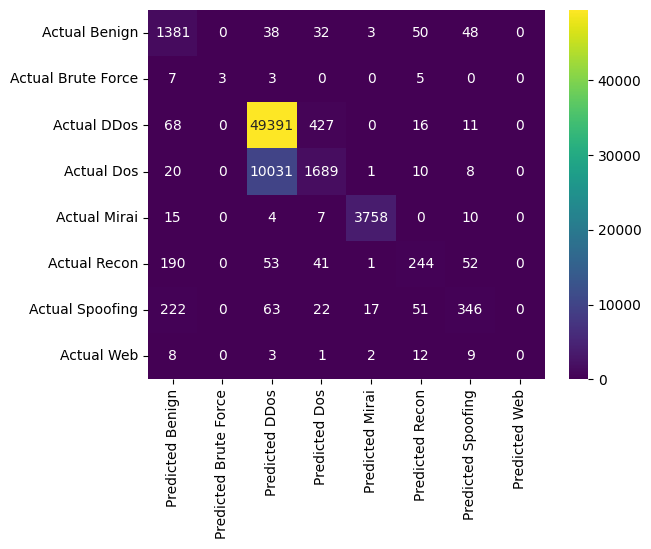

In [ ]:
plot(y_test, predict)

**Result**:
The model performs well in identifying classes like DDos and Mirai, achieving high precision, recall, and F1-scores. However, it struggles with classes like Brute Force, Dos, Recon, Spoofing, and Web, showing lower precision, recall, and F1-scores with an FP score of 256 values.

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
RF_pred = classifier.predict(x_test)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     66821
      Benign       0.83      0.79      0.81      1552

    accuracy                           0.99     68373
   macro avg       0.91      0.90      0.90     68373
weighted avg       0.99      0.99      0.99     68373



In [ ]:
RF_cm=confusion_matrix(y_test, RF_pred)

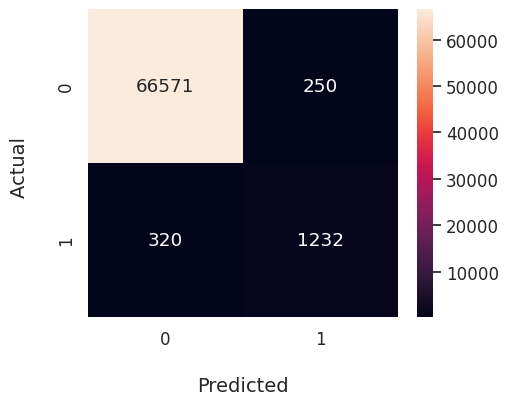

In [ ]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(5,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(RF_cm, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("Actual ", fontsize=14, labelpad=20)
#ax.set_title("Confusion Matrix for 2 class Attack Detection model", fontsize=14, pad=20)

plt.show()

For Multiple classes (8 Classes)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.90      1552
 Brute Force       0.40      0.11      0.17        18
        DDos       1.00      1.00      1.00     49913
         Dos       1.00      1.00      1.00     11759
       Mirai       1.00      0.99      1.00      3794
       Recon       0.75      0.69      0.72       581
    Spoofing       0.83      0.74      0.78       721
         Web       0.00      0.00      0.00        35

    accuracy                           0.99     68373
   macro avg       0.73      0.68      0.70     68373
weighted avg       0.99      0.99      0.99     68373



In [ ]:
#plotting a confusion matrix table
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
  labels=unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test,RF_pred),columns=column,index=indices)
  return table

plot(y_test, RF_pred)

,Predicted Benign,Predicted Brute Force,Predicted DDos,Predicted Dos,Predicted Mirai,Predicted Recon,Predicted Spoofing,Predicted Web
Actual Benign,1463,0,0,0,0,41,48,0
Actual Brute Force,7,2,0,0,0,4,5,0
Actual DDos,0,0,49907,3,1,2,0,0
Actual Dos,0,0,10,11749,0,0,0,0
Actual Mirai,0,0,15,2,3774,3,0,0
Actual Recon,127,0,8,0,2,398,45,1
Actual Spoofing,110,2,0,1,0,69,536,3
Actual Web,7,1,0,0,0,12,15,0


In [ ]:
import seaborn as sns

#plotting a heatmap
def plot(y_true, y_pred):
  labels=unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test,RF_pred),columns=column,index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

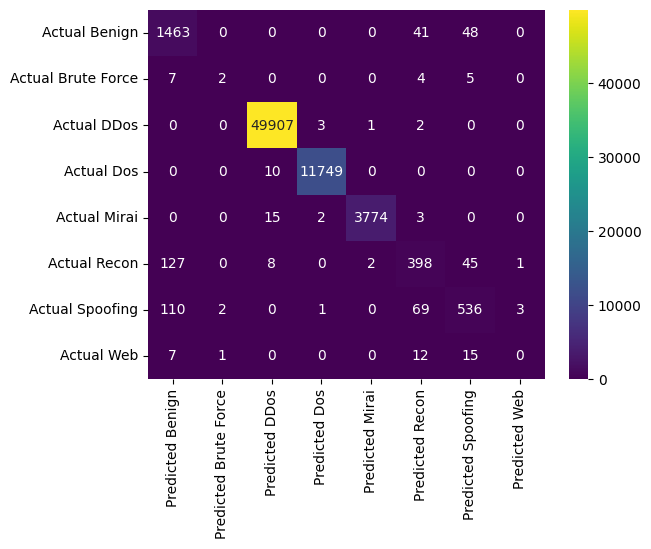

In [ ]:
plot(y_test, RF_pred)

**Conclusion:**
Compared to logistic regression, which has an accuracy of 0.83 with an FP (False Positive) score of 246, the random forest offers a superior classification accuracy of 0.99 with an FP (False Positive) score of 250. However, Considering the primary concern is minimizing false positives in a security intrusion detection system, the Random Forest model might be more suitable. Despite a slightly higher FP rate, its significantly higher precision and recall for the 'Benign' class demonstrate better capability in correctly identifying non-attack instances. This reduced misclassification of benign instances as attacks make it potentially more reliable for such a security application.

***KNN***

multiple (8 Classes)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
iot_predict=KNN.predict(x_test)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,iot_predict))

              precision    recall  f1-score   support

      Benign       0.65      0.86      0.74      1552
 Brute Force       0.04      0.06      0.05        18
        DDos       0.88      0.97      0.92     49913
         Dos       0.77      0.46      0.57     11759
       Mirai       0.97      0.93      0.95      3794
       Recon       0.56      0.41      0.47       581
    Spoofing       0.62      0.24      0.34       721
         Web       0.00      0.00      0.00        35

    accuracy                           0.86     68373
   macro avg       0.56      0.49      0.51     68373
weighted avg       0.85      0.86      0.85     68373



2 classes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
iot_predict=KNN.predict(x_test)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,iot_predict))

              precision    recall  f1-score   support

      Attack       0.99      1.00      0.99     66821
      Benign       0.77      0.56      0.65      1552

    accuracy                           0.99     68373
   macro avg       0.88      0.78      0.82     68373
weighted avg       0.98      0.99      0.99     68373



In [ ]:
iot_cm=confusion_matrix(y_test, iot_predict)

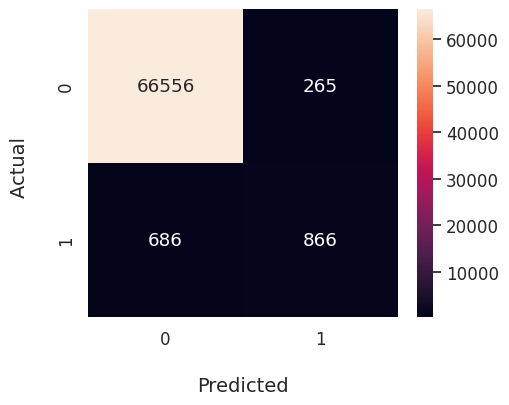

In [ ]:
import seaborn as sns

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(5,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(iot_cm, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.set_ylabel("Actual ", fontsize=14, labelpad=20)
#ax.set_title("Confusion Matrix for 2 class Attack Detection model", fontsize=14, pad=20)

plt.show()

# SWaT Dataste  Analysis

In [ ]:
from google.colab import files
upload=files.upload()

Saving SWaT_Dataset_Attack_v0.xlsx to SWaT_Dataset_Attack_v0.xlsx


In [ ]:
swat=pd.read_excel("SWaT_Dataset_Attack_v0.xlsx")
swat.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
swat.shape

(449919, 53)

In [ ]:
swat.info()

In [ ]:
swat.isna().sum()

In [ ]:
swat['Normal/Attack'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [ ]:
swat.replace('A ttack', 'Attack', inplace=True)

In [ ]:
swat.rename(columns={'Normal/Attack': 'Detect'}, inplace=True)

In [ ]:
swat['Detect'].unique()

array(['Normal', 'Attack'], dtype=object)

In [ ]:
#iloc[all rows:, from column: till column]
#X=swat.iloc[:,20:52]
X=swat[['AIT401','FIT401','LIT401', 'P302', 'P501' ]]
Y=swat['Detect']

In [ ]:
X.head()

,AIT401,FIT401,LIT401,P302,P501
0,148.808,1.713517,942.0662,2,2
1,148.808,1.715952,942.0277,2,2
2,148.808,1.715952,941.8739,2,2
3,148.808,1.714670,941.7970,2,2
4,148.808,1.714670,942.2200,2,2


In [ ]:
Y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Normal/Attack, dtype: object

In [ ]:
#splitting the data into test train sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
swat['Detect']=label_encoder.fit_transform(swat.Detect)
print(swat['Detect'])

0         1
1         1
2         1
3         1
4         1
         ..
449914    1
449915    1
449916    1
449917    1
449918    1
Name: Detect, Length: 449919, dtype: int64


***Logistic Regression***

In [ ]:
#importing the logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(lr.intercept_)

[2.1226505]


In [ ]:
predict=lr.predict(x_test)

In [ ]:
predict

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      Attack       0.99      0.61      0.76     19109
      Normal       0.95      1.00      0.97    138363

    accuracy                           0.95    157472
   macro avg       0.97      0.81      0.87    157472
weighted avg       0.95      0.95      0.95    157472



In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,11714,7395
Actual Yes,67,138296


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)
swat_predict=KNN.predict(x_test)

In [ ]:
swat_predict

array(['Normal', 'Normal', 'Attack', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,swat_predict))

              precision    recall  f1-score   support

      Attack       0.71      0.85      0.77     19109
      Normal       0.98      0.95      0.96    138363

    accuracy                           0.94    157472
   macro avg       0.84      0.90      0.87    157472
weighted avg       0.95      0.94      0.94    157472



In [ ]:
pd.DataFrame(confusion_matrix(y_test,swat_predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,16231,2878
Actual Yes,6693,131670


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
RF_swat_pred = classifier.predict(x_test)

In [ ]:
#importing for the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,RF_swat_pred))

              precision    recall  f1-score   support

      Attack       0.89      0.83      0.86     19109
      Normal       0.98      0.99      0.98    138363

    accuracy                           0.97    157472
   macro avg       0.93      0.91      0.92    157472
weighted avg       0.97      0.97      0.97    157472



In [ ]:
pd.DataFrame(confusion_matrix(y_test,RF_swat_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,15942,3167
Actual Yes,2043,136320


**Analysis:**

*   Logistic Regression: It offers a good accuracy of 95 % and a balance between precision and recall but has a relatively higher FP rate of 7395 compared to Random Forest which is 3167.
*   K-Nearest Neighbors: While having a lower FP rate of 2878 than Logistic Regression, it achieves a slightly lower accuracy which is 94%, and moderate performance metrics.

*   Random Forest: Shows the highest accuracy of 97% and a slightly higher FP rate of 3167 than Logistic Regression but delivers the best overall performance metrics.


**Conclusion:**
Considering the trade-off between accuracy and false positive rates, the Random Forest model emerges as the best choice for an intrusion detection system. It maintains a high accuracy while delivering strong performance across precision, recall, and F1-score for both Attack and Normal classes. Despite a slightly higher FP count than Logistic Regression, its overall performance metrics make it the preferred model for this Intrusion Detection System.

